In [14]:
import pandas as pd
import numpy as np
import os
os.chdir('C:\\0-ece204\\pr4')
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [15]:
merged = pd.read_csv('merged.csv')
merged.columns

Index(['patient_id', 'type', 'age_at_initial_pathologic_diagnosis', 'gender',
       'race', 'ajcc_pathologic_tumor_stage', 'histological_type',
       'histological_grade', 'tumor_status', 'vital_status', 'OS', 'OS.time',
       'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction',
       'Sample ID', 'Diagnosis Age',
       'Neoplasm Disease Stage American Joint Committee on Cancer Code',
       'American Joint Committee on Cancer Publication Version Type',
       'Aneuploidy Score', 'Buffa Hypoxia Score', 'Cancer Type',
       'TCGA PanCanAtlas Cancer Type Acronym', 'Cancer Type Detailed',
       'Last Communication Contact from Initial Pathologic Diagnosis Date',
       'Birth from Initial Pathologic Diagnosis Date',
       'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
       'Disease Free (Months)', 'Disease Free Status',
       'Months of disease-specific survival',
       'Disease-specific Survival status', 'Ethnicity Category',
      

In [16]:
df = merged[['tumor_status','Subtype']]
df = df.dropna()
df = df[df['tumor_status'] != '[Discrepancy]']
df = pd.get_dummies(df)

In [17]:
contingency_table = pd.crosstab(df['Subtype_HNSC_HPV+'], df['tumor_status_TUMOR FREE'])
chi2,p_value,_,_ = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2/(len(df)*min(contingency_table.shape[0]-1,contingency_table.shape[1]-1)))
print("Phi coefficient:", phi_coefficient)
print("P-value:", p_value)

Phi coefficient: 0.07904529699035905
P-value: 0.08966367435388384


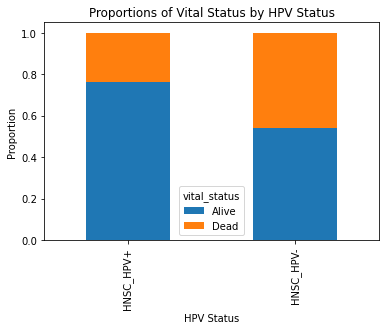

In [18]:
df = merged[['vital_status','Subtype']]
df = df.dropna()
proportions = df.groupby('Subtype')['vital_status'].value_counts(normalize=True).unstack()
proportions.plot(kind='bar', stacked=True)
plt.xlabel('HPV Status')
plt.ylabel('Proportion')
plt.title('Proportions of Vital Status by HPV Status')
plt.show()
df = pd.get_dummies(df)

In [19]:
contingency_table = pd.crosstab(df['Subtype_HNSC_HPV+'], df['vital_status_Alive'])
chi2,p_value,_,_ = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2/(len(df)*min(contingency_table.shape[0]-1,contingency_table.shape[1]-1)))
print("Phi coefficient:", phi_coefficient)
print("P-value:", p_value)

Phi coefficient: 0.15497842704418438
P-value: 0.0006260369311418409


In [20]:
df = merged[['Disease Free Status','Subtype']]
df = df.dropna()
df = pd.get_dummies(df)

In [21]:
contingency_table = pd.crosstab(df['Subtype_HNSC_HPV+'], df['Disease Free Status_0:DiseaseFree'])
chi2,p_value,_,_ = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2/(len(df)*min(contingency_table.shape[0]-1,contingency_table.shape[1]-1)))
print("Phi coefficient:", phi_coefficient)
print("P-value:", p_value)

Phi coefficient: 0.1170221375829033
P-value: 0.20366255950523302


In [22]:
df = merged[['Disease-specific Survival status','Subtype']]
df = df.dropna()
df = pd.get_dummies(df)

In [23]:
contingency_table = pd.crosstab(df['Subtype_HNSC_HPV+'], df['Disease-specific Survival status_0:ALIVE OR DEAD TUMOR FREE'])
chi2,p_value,_,_ = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2/(len(df)*min(contingency_table.shape[0]-1,contingency_table.shape[1]-1)))
print("Phi coefficient:", phi_coefficient)
print("P-value:", p_value)

Phi coefficient: 0.08629189959005065
P-value: 0.0630577040783995


In [24]:
df = merged[['age_at_initial_pathologic_diagnosis','Subtype']]
df = df.dropna()
means = df.groupby('Subtype')['age_at_initial_pathologic_diagnosis'].mean()
print(means)

Subtype
HNSC_HPV+    57.972222
HNSC_HPV-    61.496386
Name: age_at_initial_pathologic_diagnosis, dtype: float64


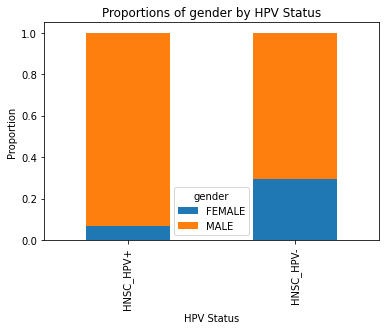

In [25]:
df = merged[['gender','Subtype']]
df = df.dropna()
proportions = df.groupby('Subtype')['gender'].value_counts(normalize=True).unstack()
proportions.plot(kind='bar', stacked=True)
plt.xlabel('HPV Status')
plt.ylabel('Proportion')
plt.title('Proportions of gender by HPV Status')
plt.show()